In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import epgcpmg as epg
%matplotlib inline
pylab.rcParams['figure.figsize'] = 10, 4


In [3]:
# angles = np.loadtxt('../data/flipangles.txt.408183520')
# angles = np.loadtxt('flipangles.txt.814192544')
angles = np.loadtxt('../../../t2shuffling-data/2017_prostate/18Sep17_Ex1388_Ser7/flipangles.txt.918164210')
angles_rad = angles * np.pi / 180.
T = len(angles_rad)
e2s = 4

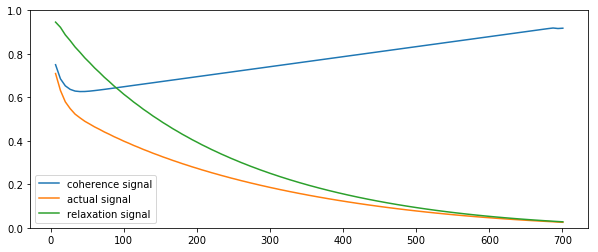

In [4]:
T1 = 1000e-3
T2 = 120e-3
TE = 6.672e-3

S_coherence = epg.FSE_signal(angles_rad, TE, 1000, 1000)
S_act = epg.FSE_signal(angles_rad, TE, T1, T2)

S_relax = S_act / S_coherence

echo_times = (1 + np.arange(T)) * TE

plt.plot(echo_times*1000, S_coherence, echo_times*1000, S_act, echo_times*1000, S_relax)
plt.ylim((0,1))
plt.legend(('coherence signal', 'actual signal', 'relaxation signal'));

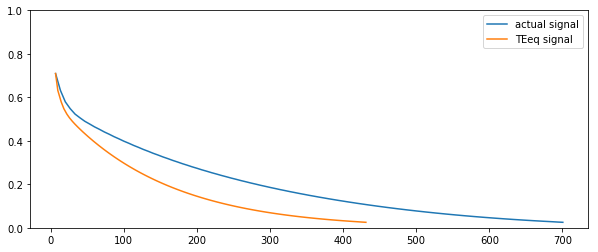

In [5]:
echo_times_eq = -T2 * np.log(S_act / S_coherence)
plt.plot(echo_times*1000, S_act, echo_times_eq*1000, S_act)
plt.ylim((0,1))
plt.legend(('actual signal', 'TEeq signal'));

In [6]:
def effective_TE(echo_times_eq, TE):
    idx = min(range(len(echo_times_eq)), key=lambda i: abs(echo_times_eq[i]-TE*1e-3)) # index of echo time
    return idx, echo_times_eq[idx]*1000

In [10]:
print effective_TE(echo_times_eq, 5)
print effective_TE(echo_times_eq, 10)
print effective_TE(echo_times_eq, 65)
print effective_TE(echo_times_eq, 80)
print effective_TE(echo_times_eq, 95)

(0, array([ 6.67119936]))
(1, array([ 9.74727932]))
(16, array([ 65.66778189]))
(20, array([ 79.93040264]))
(24, array([ 94.14555403]))


In [14]:
print 1000*echo_times_eq[e2s + np.array([29])]

[[ 126.12351259]]
